In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('cannula_data.csv')

In [7]:
df.head()

,No.,Order No.,Article No.,Article Description,Drawing,Bright Annealing,Sinking,Electro Fission,Distorted or Not
0,1,14389820,15325218,IV0.56,391.1,99.2,375.6,391.0,1
1,2,14389217,15325226,IV0.71,384.7,102.6,387.3,390.7,1
2,3,14389219,15325226,IV0.71,361.3,114.1,383.6,400.0,1
3,4,14389292,16056175,IV0.71,393.8,117.1,402.4,406.9,1
4,5,14389300,16056175,IV0.71,375.0,115.6,403.8,407.1,1


In [8]:
df.drop(['No.', 'Order No.', 'Article No. ', 'Article Description'], axis=1, inplace=True)

In [9]:
df.head()

,Drawing,Bright Annealing,Sinking,Electro Fission,Distorted or Not
0,391.1,99.2,375.6,391.0,1
1,384.7,102.6,387.3,390.7,1
2,361.3,114.1,383.6,400.0,1
3,393.8,117.1,402.4,406.9,1
4,375.0,115.6,403.8,407.1,1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [12]:
X = df['Bright Annealing'].values.reshape(-1,1)
Y = df['Distorted or Not'].values

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [16]:
Y_pred = model.predict(X_test)

print("Accuracy", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



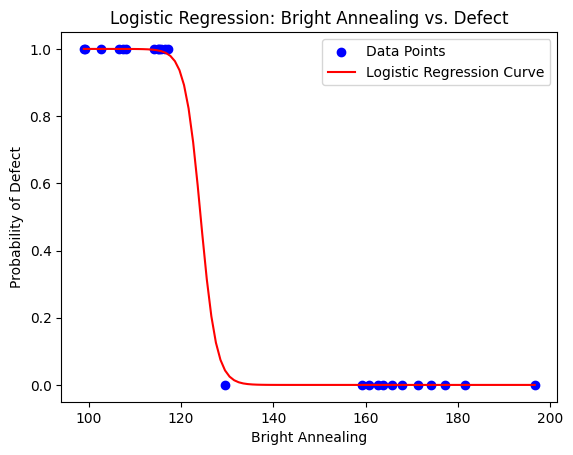

In [17]:
plt.scatter(X, Y, color='blue', label='Data Points')

X_curve = np.linspace(min(X), max(X), 100).reshape(-1,1)
Y_curve = model.predict_proba(X_curve)[:,1]

plt.plot(X_curve, Y_curve, color='red', label='Logistic Regression Curve')
plt.xlabel('Bright Annealing')
plt.ylabel('Probability of Defect')
plt.legend()
plt.title('Logistic Regression: Bright Annealing vs. Defect')
plt.show()